Consider the following linear model with a univariate response and $p$ covariates,
\begin{equation}
    Y = X\beta + \epsilon, \quad \epsilon \sim N(0, \sigma^2).
\end{equation}
We assume throughout that all variables are zero mean. Note also that introducing an intercept is not necessary, since it can be captured by augmenting the covariate and regression vector as follows,
\begin{equation}
    b + X\beta = \begin{pmatrix}1 & X\end{pmatrix}\begin{pmatrix}b \\ \beta\end{pmatrix}.
\end{equation}
We will denote a training dataset of $N$ response-covariate tuples by $\mathcal{T} = \{(y_t , x_t) | t = 1, \dots, N\}$, where each $x_t$ is a $1 \times p$ row vector representing an observation. Alternatively, we may employ matrix notation, letting $y = (y_t)_{t=1:N}$ be a row vector and $x = (x_{ti})$ an $N \times p$ matrix where each row corresponds to an observation. The least squares (LS) estimate of $\beta$ then is the minimiser of the residual sum of squares (RSS) over the training set,
\begin{equation}
    RSS(\hat\beta; \mathcal{T}) = \frac{1}{N} \sum_{t=1}^N (y_t − x_t\hat\beta)^2 = \frac{1}{N}(y − x\hat\beta)^\top (y − x\hat\beta), \quad \text{and} \quad \hat\beta^{LS}(\mathcal{T}) = \underset{{\hat\beta}}{\operatorname{argmin}} RSS(\hat\beta; \mathcal{T}).
\end{equation}
Assuming $N > p + 1$, the LS estimator can be written in closed-form as
\begin{equation}
    \hat\beta^{LS}(\mathcal{T}) = (x^\top x)^{-1} x^\top y.
\end{equation}
The dependence on the training set will be omitted when understood. We will refer to a subset of covariates as a model $\mathcal{M} \subseteq \{1, \dots, p\}$. The LS estimate for $\mathcal{M}$ is computed on a reduced dataset $\mathcal{T}^\mathcal{M}$, obtained by deleting all covariates not in the model:
\begin{equation}
    \mathcal{T}^\mathcal{M} = \left(y_t,(x_{ti})_{i \in M}\right)_{t=1:N}.
\end{equation}
For computational ease, we will instead represent the LS estimate for $\mathcal{M}$ in the $p$-dimensional space of the original model. We denote this representation by $\hat\beta^\mathcal{M}$, where
\begin{equation}
    \hat\beta_j^{\mathcal{M}}(\mathcal{T}) =
    \begin{cases}
    (\hat\beta_{\pi(j)}^{LS}(\mathcal{T}^\mathcal{M}) & j \in \mathcal{M}, \\
    0 & j \notin \mathcal{M}.
    \end{cases}
\end{equation}
Here $\pi : \mathcal{M} \to \{1, \dots, \|M\|\}$ maps indices of covariates in the model to their respective indices in the reduced dataset $\mathcal{T}^\mathcal{M}$, so that $x\hat\beta^{\mathcal{M}}(\mathcal{T})$ is a simpler notation for $x^{\mathcal{M}}\hat\beta^{LS}(\mathcal{T}^\mathcal{M})$.


---

Let $\hat\beta$ be an estimator of $\beta$. Let the new observation be $y = u\beta + \epsilon_{new}$, where $\epsilon_{new} \sim N(0, \sigma^2)$. Let the prediction be $\hat{y} = u\hat{\beta}$, where $\hat{\beta}$ is the estimator trained on dataset $\mathcal{T}$. Assume that the new observation $y$ is independent of the training set $\mathcal{T}$. Consequently, $\epsilon_{new}$ is independent of $\hat{\beta}$.

We want to decompose the expected squared prediction error $E_{\mathcal{T}, y|u} [(y - u\hat{\beta})^2]$ at an arbitrary location $u$. First, substitute the true model for $y$,
\begin{equation}
    y - u\hat{\beta} = (u\beta + \epsilon_{new}) - u\hat{\beta} = \epsilon_{new} + (u\beta - u\hat{\beta}).
\end{equation}
Square this expression,
\begin{equation}
    (y - u\hat{\beta})^2 = \epsilon_{new}^2 + 2\epsilon_{new}(u\beta - u\hat{\beta}) + (u\beta - u\hat{\beta})^2.
\end{equation}
Take the expectation
\begin{equation}
    E[(y - u\hat{\beta})^2] = E[\epsilon_{new}^2] + 2E[\epsilon_{new}(u\beta - u\hat{\beta})] + E_{\mathcal{T}}[(u\beta - u\hat{\beta})^2].
\end{equation}
Now we analyse each term individually.

1.  First term $E[\epsilon_{new}^2]$:
    \begin{equation}
        E[\epsilon_{new}^2] = \text{Var}(\epsilon_{new}) + (E[\epsilon_{new}])^2 = \sigma^2 + 0 = \sigma^2.
    \end{equation}
    This is the irreducible variance.

2.  Second term $2E[\epsilon_{new}(u\beta - u\hat{\beta})]$:
    \begin{equation}
        2E[\epsilon_{new}] E[u\beta - u\hat{\beta}] = 2(0) E[u\beta - u\hat{\beta}] = 0
    \end{equation}
    by independence.

3.  Third term: $E_{\mathcal{T}}[(u\beta - u\hat{\beta})^2]$

    This term represents the mean squared error (MSE) of the estimator $u\hat{\beta}$ regarding the true value $u\beta$. We use the standard bias-variance decomposition identity $E[X^2] = (E[X])^2 + \text{Var}(X)$ by treating $(u\hat{\beta} - u\beta)$ as the random variable centered at $0$

    \begin{equation}
        E_{\mathcal{T}}[(u\beta - u\hat{\beta})^2] = \underbrace{(u\beta - E_{\mathcal{T}}[u\hat{\beta}])^2}_{\text{Squared Bias}} + \underbrace{\text{Var}_{\mathcal{T}}[u\beta - u\hat{\beta}]}_{\text{Variance}}
    \end{equation}

    In the variance term, $u\beta$ is a constant, so $\text{Var}_{\mathcal{T}}[u\beta - u\hat{\beta}] = \text{Var}_{\mathcal{T}}[u\hat{\beta}]$.

Combining these terms yields
\begin{equation}
    E_{\mathcal{T}, y|u}(y - u\hat{\beta})^2 = \sigma^2 + \text{Bias}_{\mathcal{T}}[u\hat{\beta}]^2 + \text{Var}_{\mathcal{T}}[u\hat{\beta}].
\end{equation}

---

We now compare the least squares (LS) estimator $\hat{\beta}$ for the full model against the estimator $\hat{\beta}^{\{1, \dots, p-1\}}$ for the reduced model. We have the following simplification assumptions:
*   $x^Tx = I_p$ orthonormal design matrix. This implies the covariates are uncorrelated.
*   The estimator for the full model is normal $\hat{\beta} \sim N(\beta, \sigma^2\mathbf{I}_p)$.
*   The estimator for the reduced model effectively sets $\hat{\beta}_p = 0$ while keeping estimates for $1$ to $p-1$ unchanged due to orthogonality.

We can now analyse the effect on each term of the decomposition.

1. Irreducible variance $\sigma^2$: There is no effect as the term depends only on the inherent noise of the new observation $\epsilon_{new}$. It is independent of the selected model and the training data.

2. Squared estimation bias $(u\beta - \mathbb{E}[u\hat{\beta}])^2$: In the full model, the LS estimator is unbiased $E[\hat{\beta}] = \beta$. For the reduced model, the estimator forces the $p$-th coefficient to 0 which gives $\text{Bias}^2 = (u_p\beta_p)^2$. This is zero if and only if $\beta_p = 0$.

3. Estimation variance $u\,\text{Cov}(\hat{\beta}) u^T$: In the full model, $\text{Cov}(\hat{\beta}) = \sigma^2 (x^Tx)^{-1} = \sigma^2 I$, so $\text{Var} = \sigma^2 \sum_{j=1}^p u_j^2$. However, in the reduced model, since $\hat{\beta}_p$ is fixed to $0$, its variance is $0$ while the other coefficients retain their variance $\text{Var} = \sigma^2 \sum_{j=1}^{p-1} u_j^2$. Thus, the variance decreases by exactly $\sigma^2 u_p^2$ which is zero if and only if $u_p = 0$.

Deleting the $p$-th covariate introduces a bias-variance tradeoff. Variance can only decrease, which is beneficial but bias can only increase which is detrimental. When $\beta_p = 0$, deleting the covariate is strictly better as the variance is reduced without affecting the bias. When $\beta_p \neq 0$, deleting the covariate is beneficial only if when the true coefficient $\beta_p$ is very small relative to the noise $\sigma^2$.

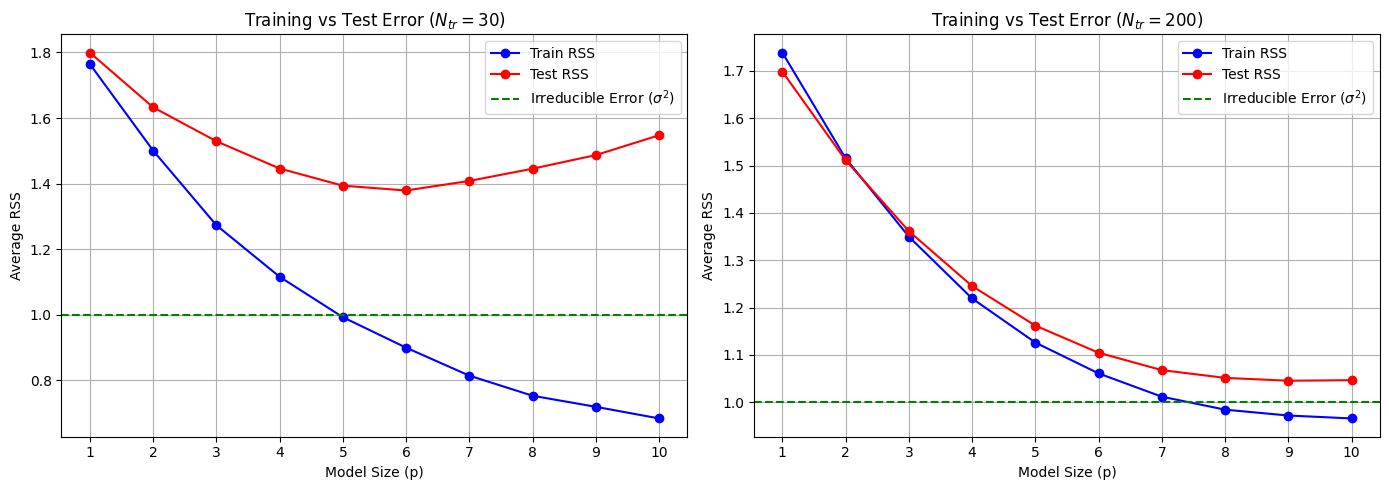

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
p = 10
sigma_sq = 1
sigma = np.sqrt(sigma_sq)
beta_true = np.array([-0.5, 0.45, -0.4, 0.35, -0.3, 0.25, -0.2, 0.15, -0.1, 0.05])

# Simulation settings
n_experiments = 100
N_tr_list = [30, 200]  # We will run for both N=30 (Question) and N=200 (Follow-up)
N_te = 1000

def run_simulation(N_tr):
    # Store errors for each model size (1 to p) across all experiments
    # Dimensions: [model_size_index, experiment_index]
    train_rss_history = np.zeros((p, n_experiments))
    test_rss_history = np.zeros((p, n_experiments))

    for i in range(n_experiments):
        # Generate training data
        X_tr = np.random.normal(0, 1, (N_tr, p))
        eps_tr = np.random.normal(0, sigma, N_tr)
        y_tr = X_tr @ beta_true + eps_tr

        # Generate test data
        X_te = np.random.normal(0, 1, (N_te, p))
        eps_te = np.random.normal(0, sigma, N_te)
        y_te = X_te @ beta_true + eps_te

        # Iterate through model sizes 1 to p
        for j in range(1, p + 1):
            # Select subset of covariates (columns 0 to j-1)
            X_tr_sub = X_tr[:, :j]
            X_te_sub = X_te[:, :j]

            # LSE
            beta_hat, _, _, _ = np.linalg.lstsq(X_tr_sub, y_tr, rcond=None)

            # Train RSS
            y_tr_pred = X_tr_sub @ beta_hat
            rss_tr = np.mean((y_tr - y_tr_pred) ** 2)

            # Test RSS
            y_te_pred = X_te_sub @ beta_hat
            rss_te = np.mean((y_te - y_te_pred) ** 2)

            train_rss_history[j-1, i] = rss_tr
            test_rss_history[j-1, i] = rss_te

    # Average over experiments
    avg_train_rss = np.mean(train_rss_history, axis=1)
    avg_test_rss = np.mean(test_rss_history, axis=1)

    return avg_train_rss, avg_test_rss


train_rss_30, test_rss_30 = run_simulation(N_tr=30)
train_rss_200, test_rss_200 = run_simulation(N_tr=200)
model_sizes = range(1, p + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(model_sizes, train_rss_30, 'o-', label='Train RSS', color='blue')
plt.plot(model_sizes, test_rss_30, 'o-', label='Test RSS', color='red')
plt.axhline(y=sigma_sq, color='green', linestyle='--', label='Irreducible Error ($\\sigma^2$)')
plt.title(f'Training vs Test Error ($N_{{tr}}=30$)')
plt.xlabel('Model Size (p)')
plt.ylabel('Average RSS')
plt.xticks(model_sizes)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(model_sizes, train_rss_200, 'o-', label='Train RSS', color='blue')
plt.plot(model_sizes, test_rss_200, 'o-', label='Test RSS', color='red')
plt.axhline(y=sigma_sq, color='green', linestyle='--', label='Irreducible Error ($\\sigma^2$)')
plt.title(f'Training vs Test Error ($N_{{tr}}=200$)')
plt.xlabel('Model Size (p)')
plt.ylabel('Average RSS')
plt.xticks(model_sizes)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Observe $N_{tr} = 30$. The training error decreases monotonically. As we increase the model complexity, the LS estimator can fit the training noise better. When the model size is too high, the model overfits significantly which pushes the training error below the noise level. The test error decreases rapidly as the first few coefficients have large magnitudes and adding these variables reduces bias significantly. However, the curve eventually starts to rise since the later coefficients are small so the variance penality dominates.

Now increase the training set size to $N_{tr} = 200$. The gap between training and test error is much smaller. The training error is higher and it is much harder to overfit noise. The test error is generally lower and is now monotonically decreasing. This is because the estimation variance of the coefficients is proportional to $p/N$ so the variance cost of adding a variable is much lower.

This effect holds in much greater generality, namely that suitably reducing the complexity of a model can improve prediction accuracy. There may also be gains in model discovery, interpretability, and reduced observation costs. Consequently, variable selection methods are of interest.